In [24]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [15]:
# visualize positional embedding
def plot_pos_emb(pos_emb, title):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.imshow(pos_emb, cmap='Blues')
    plt.colorbar()
    plt.show()

In [26]:
# sinusoidal positional embedding with explaination
def get_sinusoid_encoding_table(n_position, d_hid, padding_idx=None, l_max=10000):
    """
    Sinusoid position encoding table
    :param n_position: the number of positions
    :param d_hid: the dimension of embedding
    :param padding_idx: the index of padding token
    :return: sinusoid encoding table
    """
    def get_position_angle_vec(position):
        return [position / np.power(l_max, 2 * (hid_j // 2) / d_hid) for hid_j in range(d_hid)]


    sinusoid_table = np.array([get_position_angle_vec(pos_i) for pos_i in range(n_position)])
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])  # dim 2i+1

    if padding_idx is not None:
        # zero vector for padding dimension
        sinusoid_table[padding_idx] = 0.

    return sinusoid_table

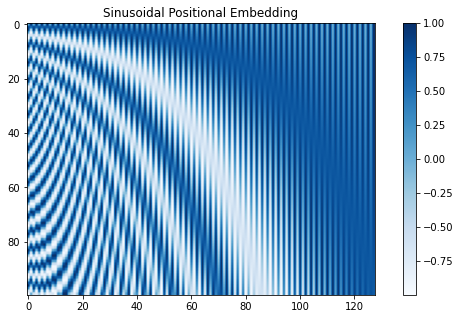

In [28]:
# plot positional embedding
pos_emb = get_sinusoid_encoding_table(n_position=100, d_hid=128, l_max=128) # 100 positions, 128 dimensions
plot_pos_emb(pos_emb, 'Sinusoidal Positional Embedding')

In [35]:
pos_emb.shape

(100, 128)

In [18]:
pos_emb_df = pd.DataFrame(pos_emb)
pos_emb_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.003792,-0.003946,0.013538,-0.006602,0.003034,-0.004638,0.018134,0.020326,0.002396,-0.005110,...,0.010165,0.999931,0.008802,0.999948,0.007622,0.999961,0.006601,0.999971,0.005716,0.999978
std,0.710744,0.710573,0.707719,0.713446,0.711492,0.709823,0.709861,0.710950,0.711982,0.709331,...,0.005957,0.000063,0.005159,0.000047,0.004467,0.000035,0.003869,0.000026,0.003350,0.000020
min,-0.999990,-0.999961,-1.000000,-0.999139,-0.999514,-0.999851,-0.999960,-0.998604,-0.999158,-0.999882,...,0.000000,0.999793,0.000000,0.999845,0.000000,0.999884,0.000000,0.999913,0.000000,0.999935
25%,-0.692374,-0.694066,-0.667238,-0.710911,-0.700964,-0.708014,-0.662437,-0.707154,-0.699196,-0.704355,...,0.005082,0.999884,0.004401,0.999913,0.003811,0.999935,0.003300,0.999951,0.002858,0.999963
50%,0.008851,-0.004426,-0.029658,0.010862,-0.008622,-0.019905,-0.008744,0.052631,-0.018796,-0.007675,...,0.010165,0.999948,0.008802,0.999961,0.007623,0.999971,0.006601,0.999978,0.005716,0.999984
75%,0.695744,0.687674,0.720951,0.681122,0.692635,0.685468,0.722394,0.709368,0.731728,0.682658,...,0.015247,0.999987,0.013203,0.999990,0.011434,0.999993,0.009901,0.999995,0.008574,0.999996
max,0.999912,1.000000,0.998182,1.000000,0.999963,1.000000,0.998115,1.000000,0.999994,1.000000,...,0.020328,1.000000,0.017604,1.000000,0.015245,1.000000,0.013201,1.000000,0.011432,1.000000


In [33]:
# plot positional embedding plotly
fig = go.Figure(data=go.Heatmap(
                     z=pos_emb,
                        colorscale='Blues'))
fig.update_layout(
    title='Sinusoidal Positional Embedding',
    xaxis_title='Dimension',
    yaxis_title='Position',
    )
fig.show()

In [34]:
# plot positional embedding for each position
fig = go.Figure()
for i in range(pos_emb.shape[0]):
    fig.add_trace(go.Scatter(x=np.arange(pos_emb.shape[1]), y=pos_emb[i], name=str(i)))

fig.update_layout(
    title='Sinusoidal Positional Embedding for each position',
    )

fig.show()


In [36]:
# plot positional embedding for each dimension
fig = go.Figure()
for i in range(pos_emb.shape[1]):
    fig.add_trace(go.Scatter(x=np.arange(pos_emb.shape[0]), y=pos_emb[:, i], name=str(i)))

fig.update_layout(
    title='Sinusoidal Positional Embedding for each dimension',
    )
fig.show()